In [12]:
from utils import *
from utils import resize_img
from matplotlib import pyplot as plt

import subprocess
from gtts import gTTS

In [13]:
orb = cv2.ORB_create()

In [14]:
#image = read_img('files/500_1.jpg')
test_img = read_img('files/test_100_1.jpg')

In [15]:

max_val = 8
max_pt = -1
max_kp = 0

In [16]:
#img = image
#orig = resize_img(img, 0.4)
#img = resize_img(orig, 0.6)

In [17]:
#img = img_to_gray(img)

In [18]:
original = resize_img(test_img, 0.4)
display('original', original)

In [19]:
(kp1, des1) = orb.detectAndCompute(test_img, None)

In [20]:
training_set = ['files/20.jpg', 'files/50.jpg', 'files/100.jpg', 'files/500.jpg']

0   files/20.jpg   10
1   files/50.jpg   17
2   files/100.jpg   21
3   files/500.jpg   14
files/100.jpg
good matches  21

Detected denomination: Rs.  100


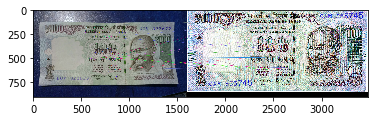

In [21]:

for i in range(0, len(training_set)):
	# train image
	train_img = cv2.imread(training_set[i])

	(kp2, des2) = orb.detectAndCompute(train_img, None)

	# brute force matcher
	bf = cv2.BFMatcher()
	all_matches = bf.knnMatch(des1, des2, k=2)

	good = []
	# give an arbitrary number -> 0.789
	# if good -> append to list of good matches
	for (m, n) in all_matches:
		if m.distance < 0.789 * n.distance:
			good.append([m])

	if len(good) > max_val:
		max_val = len(good)
		max_pt = i
		max_kp = kp2

	print(i, ' ', training_set[i], ' ', len(good))

if max_val != 8:
	print(training_set[max_pt])
	print('good matches ', max_val)

	train_img = cv2.imread(training_set[max_pt])
	img3 = cv2.drawMatchesKnn(test_img, kp1, train_img, max_kp, good, 4)
	
	note = str(training_set[max_pt])[6:-4]
	print('\nDetected denomination: Rs. ', note)

	audio_file = 'audio/' + note + '.mp3'
    #playsound(audio_file)
	#audio_file = "value.mp3"
	#tts = gTTS(text="Hello World!", lang="en")
	# tts.save(audio_file)
	#return_code = subprocess.call(["afplay", audio_file])
    #from playsound import playsoun
	(plt.imshow(img3), plt.show())
else:
	print('No Matches')

In [22]:
from playsound import playsound
playsound(audio_file)
#playsound(tere.mp3)

In [35]:
audio_file1 = 'audio/' +tere+'.mp3'

NameError: name 'tere' is not defined

In [23]:
### Draw KNN

In [ ]:
### ORP 
### Sobel Opreator
### 